In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as  hub
import tensorflow_datasets as tfds
import  numpy as np
import mtcnn
from mtcnn import MTCNN
import PIL
from PIL import Image
import pandas as pd
from IPython.display import display
import os
import matplotlib.pyplot as pyplot
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import time
import joblib
import cv2

In [5]:
model = tf.keras.models.load_model('../Transfer learning/face-recogition-colab.h5',
                                   custom_objects={'KerasLayer':hub.KerasLayer})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              55875273  
_________________________________________________________________
dense (Dense)                (None, 7)                 7014      
_________________________________________________________________
activation (Activation)      (None, 7)                 0         
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________


In [35]:
names = joblib.load('../Training Data Creation/label.pkl')
names

['Aditya Solanki',
 'Ben Afflek',
 'Elton John',
 'Jerry Seinfeld',
 'Madonna',
 'Mindy Kaling',
 'Unknown']

In [36]:
detector = MTCNN()

In [41]:
def predict_face(model, filename, detector,names):
    image = Image.open(filename)
    #Convert the file to RGB
    image = image.convert('RGB')
    #Convert the File to Numpy array to be machine readable
    pixels = np.asarray(image)
    
    #Extracting Face embeddings from the Photo
    result = detector.detect_faces(pixels)
    #print(result)
    if len(result) == 0 :
        print ('No Face detected in this photo')
        return []
    else:
        predictions_dict = {}
        for i in range(len(result)):
            return_name = ''
            x1, y1, width, height = 0 , 0 , 0, 0
            co_ordinates = []
            x1, y1, width, height = result[i]['box']
            co_ordinates.append(x1)
            co_ordinates.append(y1)
            co_ordinates.append(width)
            co_ordinates.append(height)
            x1, y1 = abs(x1) , abs(y1)
            x2, y2 = abs(x1) + width , abs(y1) + height 
            face = pixels[y1:y2, x1:x2]
            image = Image.fromarray(face)
            image = image.resize((299,299))
            face_array = np.asarray(image)
            face_pixels  = face_array / 255
            samples = np.expand_dims(face_pixels, axis = 0)
            prediction = model.predict(samples)
            predict = dict(zip(names, prediction[0]))
            predict_reverse = dict(zip(prediction[0], names))
            percentage = max(predict_reverse)  * 100
            name = predict_reverse[max(predict.values())]
            return_name = name + '_' + str(i)
            co_ordinates.append(percentage)
            predictions_dict[return_name] = co_ordinates
    return predictions_dict

In [42]:
filename = ('../data/test/hill.jpg')
prediction = predict_face(model, filename,detector, names)
prediction

{'Jerry Seinfeld_0': [983, 187, 129, 178, 85.79606413841248],
 'Jerry Seinfeld_1': [1140, 239, 119, 147, 73.97459149360657],
 'Unknown_2': [1536, 273, 174, 226, 74.10141229629517],
 'Unknown_3': [341, 476, 249, 342, 87.19853162765503],
 'Unknown_4': [731, 603, 327, 491, 95.4735517501831],
 'Jerry Seinfeld_5': [1369, 202, 133, 167, 54.14051413536072],
 'Unknown_6': [1300, 451, 166, 222, 87.24544644355774],
 'Unknown_7': [767, 329, 156, 211, 91.68621301651001]}

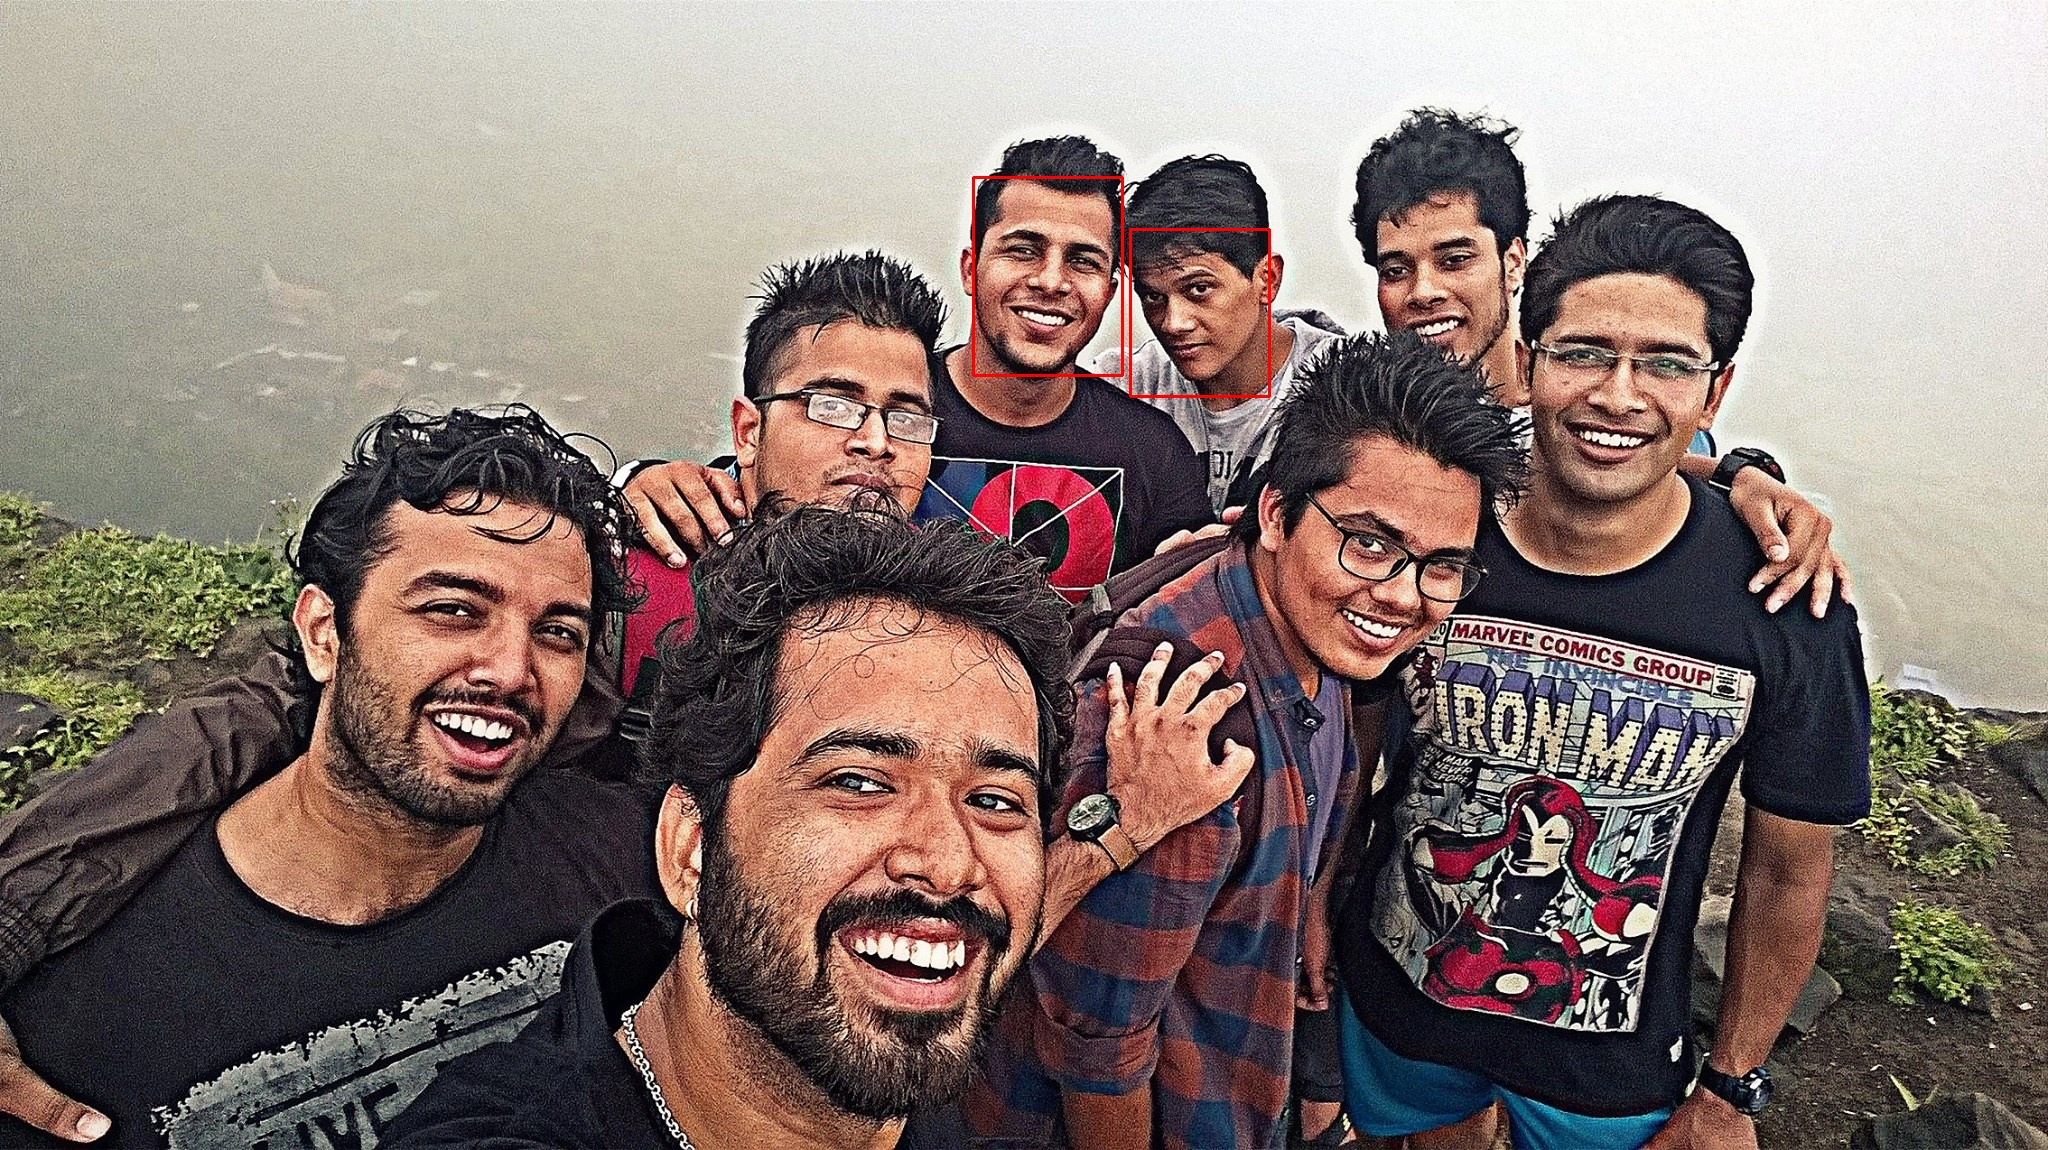

In [43]:
if len(prediction)== 0:
    print ('Sorry no output')
else:
    image = cv2.imread(filename)
    for i in prediction.keys():
        names = i.split('_')
        x1, y1, width, height ,percent  = 0,0,0,0, 0
        x1, y1, width, height , percent = prediction[i]
        if names[0] == 'Unknown' or percent < 60 :
            continue
        else:
            x1, y1 = abs(x1) , abs(y1)
            x2, y2 = abs(x1) + width , abs(y1) + height
            x1 -= 10
            y1 -= 10
            x2 += 10
            y2 += 10
            start_point = (x1, y2) 
            end_point = (x2, y1)
            # Color Order by Blue Green Red
            if names[0] == 'Aditya Solanki':
                color = (0,255, 255)#Yellow
            elif names[0] == 'Ben Afflek':
                color = (255,0, 0) #Blue
            elif names[0] == 'Elton John':
                color = (0,255, 0) #Green
            elif names[0] == 'Jerry Seinfeld':
                color = (0,0, 255) #Red
            elif names[0] == 'Madonna':
                color = (0, 0, 0) #Black
            elif names[0] == 'Mindy Kaling':
                color = (255, 255, 255) #White
            elif names[0] == 'Unknown':
                color = (255,255, 0) #Aqua
            thickness = 2
            image = cv2.rectangle(image, start_point, end_point, color, thickness) 
    cv2.imwrite('Highlighted.jpg', image)
image = Image.open('Highlighted.jpg')
image